In [ ]:
# default_exp datasets
from nbdev.showdoc import *
import numpy as np
import torch
%load_ext autoreload
%autoreload 2

## Official test dataset: Swiss Roll, Branch, and Clusters

## Swiss Roll

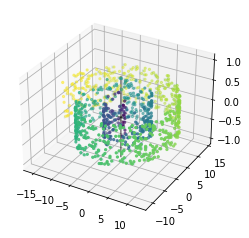

In [ ]:
from directed_graphs.datasets import directed_swiss_roll_uniform, plot_directed_3d
X, flow, labels = directed_swiss_roll_uniform(num_nodes=1000, num_spirals=2.5, radius=1, height=1, xtilt=0, ytilt=0)
plot_directed_3d(X, flow, labels)

## Branch

In [ ]:
# export
def directed_sin_branch(num_nodes=1000, xscale=1, yscale=1, sigma=0.25):
  num_nodes_per_branch = num_nodes//3
  # root
  x_root = np.random.uniform(-xscale*np.pi*0.84, 0, num_nodes - 2*num_nodes_per_branch)
  x_root = np.sort(x_root)
  y_root = np.sinh(x_root / xscale) * yscale
  v_root = np.cosh(x_root / xscale) / xscale * yscale
  # branch 1
  x_branch1 = np.random.uniform(0, xscale*np.pi*0.84, num_nodes_per_branch)
  x_branch1 = np.sort(x_branch1)
  y_branch1 = np.sinh(x_branch1 / xscale) * yscale
  v_branch1 = np.cosh(x_branch1 / xscale) / xscale * yscale
  # branch 2
  x_branch2 = np.random.uniform(0, xscale*2*np.pi, num_nodes_per_branch)
  x_branch2 = np.sort(x_branch2)
  y_branch2 = np.sin(x_branch2 / xscale) * yscale
  v_branch2 = np.cos(x_branch2 / xscale) / xscale * yscale
  # stack
  x = np.concatenate((x_branch1, x_branch2, x_root))
  y = np.concatenate((y_branch1, y_branch2, y_root)) + np.random.normal(loc=0, scale=sigma, size=num_nodes)
  v = np.concatenate((v_branch1, v_branch2, v_root))
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  u = np.ones(num_nodes)
  w = np.zeros(num_nodes)
  flow = np.column_stack((u, v, w))
  # labels
  labels = np.concatenate((x_branch1 - np.pi*3, x_branch2, x_root + np.pi*3))
  return X, flow, labels


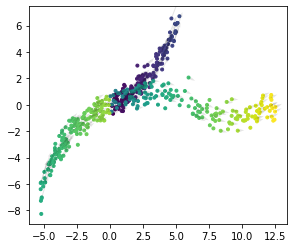

In [ ]:
from directed_graphs.datasets import plot_directed_2d
X, flow, labels = directed_sin_branch(num_nodes=500, xscale=2, yscale=1, sigma=0.5)
plot_directed_2d(X, flow, labels)

## Clusters

In [ ]:
# export
def static_clusters(num_nodes=250, num_clusters=5, radius=1, sigma=0.2):
  thetas = np.repeat([2*np.pi*i/num_clusters for i in range(num_clusters)], num_nodes//num_clusters)
  x = np.cos(thetas) * radius + np.random.normal(loc=0, scale=sigma, size=num_nodes)
  y = np.sin(thetas) * radius + np.random.normal(loc=0, scale=sigma, size=num_nodes)
  z = np.zeros(num_nodes)
  X = np.column_stack((x, y, z))
  flow = np.zeros(X.shape)
  return X, flow, thetas

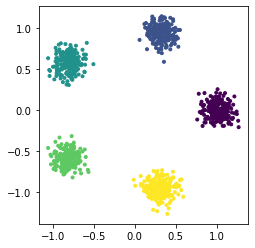

In [ ]:
from directed_graphs.datasets import plot_directed_2d
X, flow, labels = static_clusters(num_nodes=1000, num_clusters=5, radius=1, sigma=0.1)
plot_directed_2d(X, flow, labels)